In [1]:
import numpy as np
import matplotlib.pyplot as plt

-- Tabla generada para señal: semicircle
constant wave_table : array(0 to 255) of integer := (
 0, 8192, 11562, 14133, 16287, 18173, 19867, 21416,
 22849, 24186, 25442, 26629, 27756, 28830, 29857, 30840,
 31785, 32695, 33572, 34419, 35238, 36032, 36801, 37547,
 38272, 38976, 39662, 40329, 40979, 41612, 42230, 42832,
 43420, 43995, 44556, 45104, 45639, 46163, 46675, 47176,
 47667, 48147, 48616, 49076, 49526, 49967, 50399, 50821,
 51236, 51641, 52039, 52428, 52810, 53184, 53550, 53909,
 54261, 54606, 54943, 55274, 55598, 55916, 56226, 56531,
 56829, 57122, 57408, 57688, 57962, 58230, 58493, 58750,
 59001, 59247, 59487, 59722, 59951, 60176, 60395, 60609,
 60818, 61022, 61220, 61414, 61603, 61787, 61967, 62141,
 62311, 62476, 62637, 62793, 62944, 63091, 63233, 63371,
 63504, 63633, 63757, 63877, 63993, 64104, 64211, 64314,
 64413, 64507, 64597, 64683, 64764, 64842, 64915, 64984,
 65049, 65110, 65167, 65220, 65268, 65313, 65353, 65390,
 65422, 65450, 65475, 65495, 65511, 65523, 65531, 65535

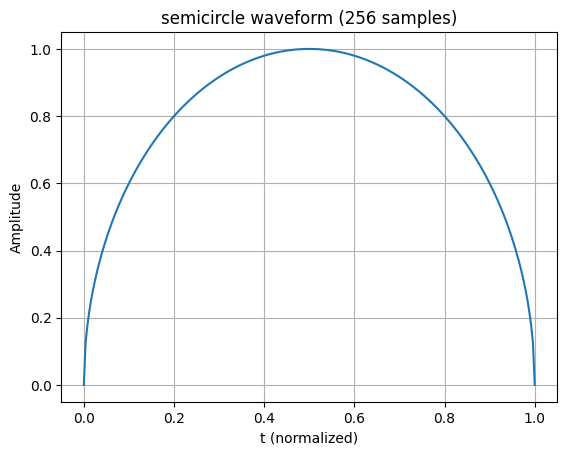

In [9]:


# ==========================================================
# CONFIGURACIÓN
# ==========================================================
N = 256                 # Número de muestras
A = 65535               # Amplitud máxima (16 bits sin signo)
wave_type = "semicircle"   # Tipo de señal
normalize = True

# ==========================================================
# GENERACIÓN DE SEÑAL
# ==========================================================
t = np.linspace(0, 1, N)

if wave_type == "sine":
    y = 0.5 * (1 + np.sin(2 * np.pi * t))  # seno normalizado (0 a 1)

elif wave_type == "triangle":
    y = 2 * np.abs(2 * (t - np.floor(t + 0.5)))  # triángulo 0-2
    y = 1 - y/2

elif wave_type == "square":
    y = np.where(np.sin(2*np.pi*t) >= 0, 1, 0)

elif wave_type == "sawtooth":
    y = t  # rampa lineal 0-1

elif wave_type == "semicircle":
    y = np.sqrt(1 - (2*t - 1)**2)  # semicirc. de radio 1
    y[np.isnan(y)] = 0

elif wave_type == "exponential":
    tau = 0.25
    y = 1 - np.exp(-t/tau)

elif wave_type == "biexponential":
    dt = 25 / N
    tau1 = 0.01
    tau2 = 0.1
    y = (np.exp(-(t-dt)/tau2) - np.exp(-(t-dt)/tau1))*np.heaviside(t-dt, 1)
    y -= np.min(y)  # quitar valores negativos

else:
    raise ValueError("Tipo de señal no reconocido")

# Normalización a rango de 0 a 65535
if normalize:
    y = y / np.max(y)
y_int = np.round(A * y).astype(int)

# ==========================================================
# EXPORTACIÓN A FORMATO VHDL
# ==========================================================
print("-- Tabla generada para señal:", wave_type)
print("constant wave_table : array(0 to {0}) of integer := (".format(N-1))

for i, val in enumerate(y_int):
    end_char = "," if i < N-1 else ""
    print(f" {val}{end_char}", end="")
    if (i+1) % 8 == 0:
        print()  # salto de línea cada 8 valores

print(");")

# ==========================================================
# GRAFICAR
# ==========================================================
plt.plot(t, y)
plt.title(f"{wave_type} waveform ({N} samples)")
plt.xlabel("t (normalized)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()
